In [1]:
# Get mutual fund historical data from Yahoo! Finance

# Load some useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
from bs4 import BeautifulSoup
import json
import requests
from selenium import webdriver
import time
import re


In [2]:
# Mid Cap Growth Selector from Fidelity- >5yr Manager, >5yr fund inception, >50M assets
URL = "https://www.fidelity.com/fund-screener/evaluator.shtml#!&ft=DSTK_MG&ntf=N&expand=%24FundType&mTn=GS5&iDt=GS5&fAt=GS50000000"
browser = webdriver.Chrome(executable_path = 'C:\\Program Files\\ChromeDriver\\chromedriver_win32\\chromedriver.exe')
browser.get(URL)
time.sleep(5) #wait for webpage to load fully

In [3]:
def getFundsFromPage(browser, fundnames = set()): 
    '''Get Fund Tickers from Fidelity Mutual Fund Search'''
    table = browser.find_element_by_class_name('right-content')
    table = table.find_element_by_id('grid_body')
    links = table.find_elements_by_tag_name('a')
    for link in links: 
        text = link.text
        ticker = re.search(r'\([A-Z]{5}\)', text)
        if ticker: 
            ticker = ticker.group(0)[1:-1]
            fundnames.add(ticker)
    return fundnames

In [4]:
LIMIT = 30 # stop loop at 30 if too many pages
i = 0
while(i < LIMIT): 
    fundnames = getFundsFromPage(browser)
    print(f'Total # of Funds Found: {len(fundnames)}')
    try: 
        browser.find_element_by_link_text('Next').click()
        time.sleep(2)
        i+=1
    except: 
        break

fundnames = list(fundnames)
        

Total # of Funds Found: 21
Total # of Funds Found: 41
Total # of Funds Found: 61
Total # of Funds Found: 81
Total # of Funds Found: 101
Total # of Funds Found: 121
Total # of Funds Found: 140
Total # of Funds Found: 160
Total # of Funds Found: 180
Total # of Funds Found: 187


In [5]:
def YahooTotalReturnHistorytoCSV(ticker, df): 
    '''Get Yearly Total Returns from Yahoo! Finance and append to dataframe'''
    URL = "https://finance.yahoo.com/quote/"+ticker+"/performance?p="+ticker
    response = requests.get(URL)
    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all(class_ = "Mb(25px)")
    totalreturn = tables[2]
    totalreturn = list(totalreturn.children)
    title = totalreturn[0].text
    table = totalreturn[1]
    rows = list(table.children)
    df[ticker] = np.NaN
    if len(rows) > 1: 
        #colheaders = [tag.text for tag in rows[0].children]
        #trDF = pd.DataFrame(columns = colheaders)
        num_rows = len(rows)-1
        for i in range(2, num_rows+1): #skip column header and current year
            #data = [tag.text for tag in rows[i].children]
            #trDF.loc[i-1] = data
            year, _, fundtr, cattr = [tag.text for tag in rows[i].children]
            df.loc[int(year), ticker] = fundtr
        #trDF.to_csv(ticker+'.csv')
    return df

def getYahooFundProfile(ticker, df = pd.DataFrame()): 
    '''Get Fund Profile Metrics from Yahoo! Finance and append to dataframe '''
    INDEX_profiletable = 0
    INDEX_fundoperations = 1
    INDEX_fundexpenses = 2
    URL = "https://finance.yahoo.com/quote/" + ticker + "/profile?p=" + ticker
    response = requests.get(URL)
    response.content
    soup = BeautifulSoup(response.content, 'html.parser')
    datatables = soup.find_all(class_ = "Mb(25px)")
    overview = datatables[INDEX_profiletable].find('div')
    funddata = dict()
    for row in overview.children: 
        [name, value] = [tag.text for tag in list(row)]
        funddata[name] = value
    operations = datatables[INDEX_fundoperations].find('div')
    for row in operations.children: 
        [name, value] = [tag.text for tag in list(row)]
        funddata[name] = value


    expenses = datatables[INDEX_fundexpenses].find('div')
    for row in expenses.children:
        [name, value, _] = [tag.text for tag in list(row)]
        funddata[name] = value
    
    funddf = pd.DataFrame(funddata, index = [0])
    df = df.append(funddf, ignore_index = True)
    return df

In [6]:
funddata = pd.DataFrame()
totalreturn = pd.DataFrame(index = range(1924, 2019)) #First mutual fund founded in 1924
WAIT_TIME = 1 # rate limiter 
for ticker in fundnames: 
    totalreturn = YahooTotalReturnHistorytoCSV(ticker, totalreturn)
    funddata = getYahooFundProfile(ticker, df = funddata.copy())
    print(ticker)
    time.sleep(WAIT_TIME)

TEGAX
CHCCX
CFAGX
STMGX
HAGIX
SMFAX
TCMGX
NEEIX
HRAYX
CCSMX
NBMLX
IMIDX
HAGCX
NMGAX
FAMVX
MPEGX
WFDAX
TEGYX
HDPMX
HFMTX
VLMIX
TMDPX
WFDSX
TOPPX
NNTWX
CCSGX
BARIX
PGRRX
DRMCX
RMDAX
AMCZX
HFMVX
HLGEX
BFGFX
DFDMX
LCLAX
NMCCX
RIVBX
HAGAX
WCGNX
WMGAX
KAUAX
NCTWX
NWHWX
NWHVX
HFCIX
BPTRX
TOECX
SUFCX
OMGCX
BFGIX
PGWIX
FRSGX
OEGAX
NMCAX
RSSYX
HMDYX
BGRIX
GIUIX
HFCSX
TEGIX
FDEGX
FRSIX
ETILX
BARAX
MERAX
NEEGX
VSNGX
HFMIX
WDSCX
FGSIX
SENAX
CIPIX
KNPAX
JSMVX
MACGX
VMCCX
BPTIX
MGOAX
GGOAX
DBMAX
SEUPX
VMACX
KNPYX
BMGCX
APDMX
AWMIX
HOPCX
CMGSX
BMDIX
VMGMX
JMCCX
RMDCX
LBGAX
PSKCX
WSMNX
WFDDX
OTCCX
TMCAX
QMLAX
JSMTX
AMGAX
TMFGX
HSOAX
WWNPX
ETAGX
HDPIX
PEGCX
RIVRX
NEXTX
APSGX
PHSKX
KAUCX
MXXIX
MGOTX
BMGAX
GROYX
WSMDX
CHCLX
WCGIX
VALSX
GOFCX
ARTMX
MIMSX
FOGIX
JCMAX
PEGEX
ADJEX
WFEIX
WENCX
FGSCX
BQMGX
KAUIX
HFMSX
MCMYX
HAMGX
HFMRX
BWAFX
RESCX
PPIMX
BMDSX
NBNGX
RSDGX
FAMWX
ATGCX
ETCGX
PRDMX
RMOYX
TMCIX
BUFTX
RMBMX
GGOCX
VIMCX
KNPCX
AMGCX
RSMOX
ATGAX
DBMCX
PEEAX
PEGZX
BGRFX
FGSAX
HIMGX
BRWIX
PICMX
FOGRX
PGOF

In [7]:
funddata

,Category,Fund Family,Net Assets,YTD Return,Yield,Morningstar Rating,Inception Date,Last Dividend,Last Cap Gain,Holdings Turnover,...,Expense,Annual Report Expense Ratio (net),Prospectus Net Expense Ratio,Prospectus Gross Expense Ratio,Max 12b1 Fee,Max Front End Sales Load,Max Deferred Sales Load,3 Yr Expense Projection,5 Yr Expense Projection,10 Yr Expense Projection
0,Mid-Cap Growth,Touchstone,1.2B,28.01%,0.00%,★★★★,"Oct 2, 1994",0.00,0.00,71.00%,...,TEGAX,1.27%,1.27%,1.27%,0.25%,5.00%,N/A,883,"1,162","1,957"
1,Mid-Cap Growth,AllianceBernstein,2.61B,24.29%,0.00%,★★★,"May 2, 1993",0.00,0.00,72.00%,...,CHCCX,1.74%,1.74%,1.74%,1.00%,N/A,1.00%,548,944,"2,052"
2,Mid-Cap Growth,Commerce,216.67M,27.40%,0.36%,★★★★,"Dec 11, 1994",0.00,0.00,71.00%,...,CFAGX,0.84%,0.84%,0.84%,N/A,N/A,N/A,267,463,"1,031"
3,Mid-Cap Growth,American Beacon,317.89M,22.87%,0.00%,★★★★,"Jan 31, 2006",0.00,0.00,N/A,...,STMGX,1.25%,1.25%,1.27%,N/A,N/A,N/A,401,695,"1,532"
4,Mid-Cap Growth,Carillon Family of Funds,5.78B,28.51%,0.00%,★★★★,"Jun 20, 2006",0.00,0.00,44.00%,...,HAGIX,0.75%,0.75%,0.75%,0.00%,N/A,N/A,240,417,930
5,Mid-Cap Growth,American Beacon,317.89M,22.87%,0.00%,★★★,"Feb 23, 2012",0.00,0.00,N/A,...,SMFAX,1.29%,1.29%,1.32%,0.25%,5.75%,N/A,966,"1,254","2,071"
6,Mid-Cap Growth,TIAA Investments,1.47B,27.25%,0.04%,★★★,"Sep 30, 2002",0.00,0.00,70.00%,...,TCMGX,0.77%,0.77%,0.77%,0.25%,N/A,N/A,246,428,954
7,Mid-Cap Growth,Needham,94.59M,25.26%,0.00%,★★,"Dec 29, 2016",0.00,0.00,8.00%,...,NEEIX,2.21%,2.21%,2.48%,N/A,N/A,N/A,747,"1,296","2,796"
8,Mid-Cap Growth,Carillon Family of Funds,5.78B,28.32%,0.00%,★★★★,"Nov 19, 2017",0.00,0.00,44.00%,...,HRAYX,1.13%,1.13%,1.13%,0.25%,N/A,N/A,359,622,"1,375"
9,Mid-Cap Growth,Conestoga Capital Advisors,124.03M,28.66%,0.00%,★★★★★,"Jan 20, 2014",0.00,0.00,8.00%,...,CCSMX,1.10%,1.10%,2.15%,0.25%,N/A,N/A,572,"1,058","2,400"


In [9]:
funddata.to_csv('funddata_MidCapGrow_50Mil_5Yr_5YR.csv')
totalreturn.to_csv('totalreturn_MidCapGrow_50Mil_5Yr_5YR.csv')

In [31]:
#load previously scraped data from text files
totalreturn = pd.read_csv('totalreturn_MidCapGrow_50Mil_5Yr_5YR.csv', index_col = 0)
funddata = pd.read_csv('funddata_MidCapGrow_50Mil_5Yr_5YR.csv', index_col = 0)

#rename expense to ticker - quirk when scraping file 
funddata.rename(columns = {'Expense': 'Ticker'}, inplace = True)
numYears, numFunds = totalreturn.shape

In [32]:
totalreturn

,TEGAX,CHCCX,CFAGX,STMGX,HAGIX,SMFAX,TCMGX,NEEIX,HRAYX,CCSMX,...,OTCAX,NMGCX,SSMGX,GTSGX,CMIDX,VLIFX,HFMCX,CMGIX,KMKNX,RSGFX
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
def trStrtoFloat(string): 
    try: 
        string = string[0:-1]
        percent = float(string)
        return percent
    except: 
        return string

totalreturn = totalreturn.apply(lambda entries: [trStrtoFloat(entry) for entry in entries], axis = 1, result_type = 'broadcast')
totalreturn['count'] = totalreturn.count(axis = 1)

In [34]:
totalreturn

,TEGAX,CHCCX,CFAGX,STMGX,HAGIX,SMFAX,TCMGX,NEEIX,HRAYX,CCSMX,...,NMGCX,SSMGX,GTSGX,CMIDX,VLIFX,HFMCX,CMGIX,KMKNX,RSGFX,count
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Start Year: 1997


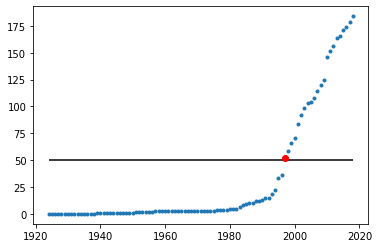

In [68]:
plt.plot(totalreturn['count'], '.')
NUMFUNDSTHRESH = 50
plt.hlines(NUMFUNDSTHRESH, 1924, 2018)
start_index = np.where(totalreturn['count'] > NUMFUNDSTHRESH)[0][0]
start_year = totalreturn.index[start_index]
plt.plot(start_year, totalreturn['count'].values[start_index], 'ro')
print(f'Start Year: {start_year}')

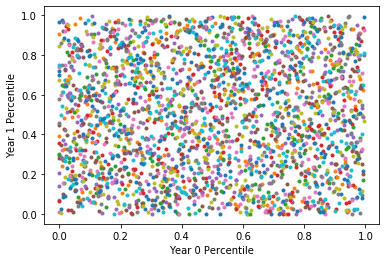

In [69]:
ranked = pd.DataFrame(index = totalreturn.index[start_index:], columns = totalreturn.columns[:-1] ) #dataframe to store rankings
working = totalreturn.iloc[start_index:, :-1] #take years of interest
order = working.apply(np.argsort, axis = 1).astype('float64') # get rank by total return in given year, highest is better
order['count'] = totalreturn['count'] #count number of funds with total return data in year

def returnNaN(num): 
    '''replace negative values from argsort with NaN'''
    if num < 0: 
        return np.NaN
    else: 
        return num

#convert order to percentile to account for varying number of funds / year
percentile = order.apply(lambda entries: [returnNaN(entry/(entries['count'])) for entry in entries], axis = 1, result_type = 'broadcast')
percentile.drop(columns = ['count'], inplace=True)
percentile['year'] = percentile.index

#plot yr vs yr percentile rank
def calcYrVsYrCorr(percentiledf, yr1, yr2, plotOn = False): 
    testdf = percentiledf.loc[[yr1, yr2]]
    testdf.dropna(axis = 'columns', how = 'any', inplace = True)
    if plotOn:
        plt.plot(testdf.iloc[0,:-1], testdf.iloc[1,:-1], '.') #plot each rows skipping last year column
    return testdf


def plotYrVsNextCorr(percentiledf, yr): 
    calcYrVsYrCorr(percentiledf, yr, yr+1, plotOn = True)

plt.figure()
for year in totalreturn.index[start_index:-1]: 
    plotYrVsNextCorr(percentile, year)
    plt.xlabel('Year 0 Percentile')
    plt.ylabel('Year 1 Percentile')

Number of Funds to Plot: 52


<Figure size 432x288 with 0 Axes>

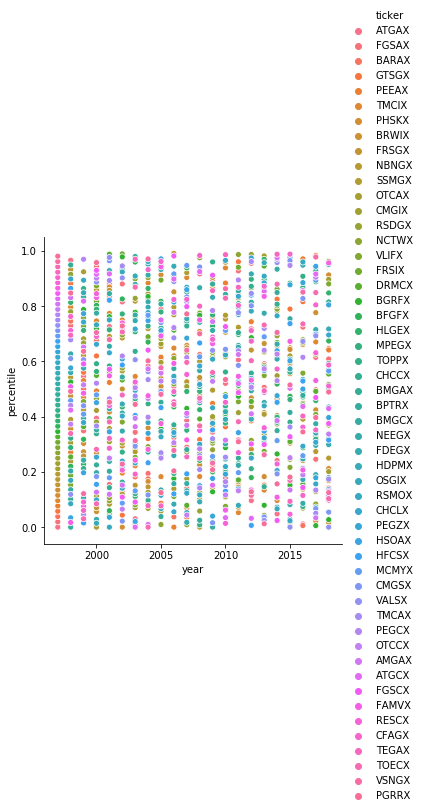

In [154]:
plt.figure()
subset = percentile.dropna(axis = 'columns', how = 'any')
subset = subset.sort_values(by = [start_year], axis = 'columns', ascending = True)
fundsubset = subset.columns[0:-1:1]
subset = subset.loc[:, np.append(fundsubset.values, 'year')]
numyears, numfunds = subset.shape
print(f'Number of Funds to Plot: {numfunds-1}')
plottingdf = pd.melt(subset, id_vars = ['year'], value_vars = subset.columns.values[:-1], value_name = 'percentile',
                    var_name = 'ticker' )
ax = sns.relplot(x = 'year', y = 'percentile', hue = 'ticker', kind = 'scatter', palette = 'husl', data = plottingdf)

Text(0, 0.5, 'Percentile Rank')

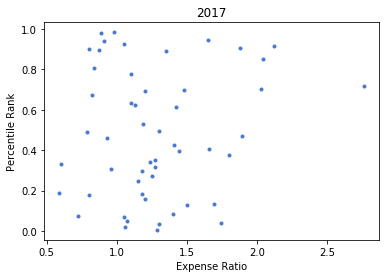

In [169]:
expratio = [trStrtoFloat(funddata.loc[funddata['Ticker']== fund, 'Annual Report Expense Ratio (net)'].values[0]) for fund in fundsubset]
plt.figure()
year = start_year + 20
plt.plot(expratio, subset.loc[year, fundsubset].values, '.')
plt.title(str(year))
plt.xlabel('Expense Ratio')
plt.ylabel('Percentile Rank')

In [151]:
subset.loc[start_year, fundsubset].values

array([0.        , 0.09615385, 0.19230769, 0.28846154, 0.38461538,
       0.48076923, 0.57692308, 0.67307692, 0.76923077, 0.86538462,
       0.96153846])

In [139]:
funddata.loc[funddata['Ticker'].isin(fundsubset),:]

,Category,Fund Family,Net Assets,YTD Return,Yield,Morningstar Rating,Inception Date,Last Dividend,Last Cap Gain,Holdings Turnover,...,Ticker,Annual Report Expense Ratio (net),Prospectus Net Expense Ratio,Prospectus Gross Expense Ratio,Max 12b1 Fee,Max Front End Sales Load,Max Deferred Sales Load,3 Yr Expense Projection,5 Yr Expense Projection,10 Yr Expense Projection
14,Mid-Cap Growth,FAM,1.32B,19.41%,0.09%,★★★,"Jan 1, 1987",0.07,0.0,12.00%,...,FAMVX,1.19%,1.19%,1.20%,NaN,NaN,NaN,380,659,"1,454"
32,Mid-Cap Growth,JPMorgan,4.55B,29.03%,0.00%,★★★★,"Mar 1, 1989",0.00,0.0,NaN,...,HLGEX,0.93%,0.93%,1.01%,NaN,NaN,NaN,314,550,"1,229"
46,Mid-Cap Growth,Baron Capital Group,2.38B,24.79%,0.00%,★★★★,"Apr 29, 2003",0.12,0.0,8.09%,...,BPTRX,2.03%,2.03%,2.03%,0.25%,NaN,NaN,637,"1,093","2,358"
59,Mid-Cap Growth,Hennessy,1.75B,25.54%,0.00%,★★★,"Jan 2, 1997",0.00,0.0,13.00%,...,HFCSX,1.48%,1.48%,1.48%,0.15%,NaN,NaN,468,808,"1,768"
67,Mid-Cap Growth,JPMorgan,2.71B,21.70%,0.42%,★★★,"Dec 30, 1996",0.00,0.0,34.00%,...,VSNGX,0.89%,0.89%,1.01%,NaN,NaN,NaN,310,546,"1,225"
107,Mid-Cap Growth,PGIM Funds (Prudential),3.35B,29.32%,0.00%,★★,"Dec 30, 1996",0.00,0.0,36.00%,...,PEGCX,1.69%,1.69%,1.69%,1.00%,NaN,1.00%,533,918,"1,998"
148,Mid-Cap Growth,RBC Global Asset Management.,91.9M,23.29%,0.00%,★★★,"May 31, 1994",0.00,0.0,22.00%,...,TMCIX,0.82%,0.82%,0.98%,NaN,NaN,NaN,296,526,"1,187"
156,Mid-Cap Growth,Aquila,313.4M,26.96%,0.00%,★★★,"Jul 21, 1994",0.00,0.0,123.00%,...,ATGAX,1.42%,1.42%,1.42%,0.30%,4.25%,NaN,855,"1,168","2,055"
172,Mid-Cap Growth,JPMorgan,4.55B,28.75%,0.00%,★★★,"Feb 17, 1992",0.00,0.0,NaN,...,OSGIX,1.24%,1.24%,1.31%,0.25%,5.25%,NaN,912,"1,199","2,015"
179,Mid-Cap Growth,Sit,95.6M,20.32%,0.00%,★,"Jun 30, 1994",0.00,0.0,26.34%,...,SSMGX,1.50%,1.50%,1.50%,NaN,NaN,NaN,477,824,"1,801"


In [ ]:
print(funddata.loc[funddata['Ticker'] == 'SSMGX', 'Annual Report Expense Ratio (net)'][0])
trStrtoFloat(funddata.loc[funddata['Ticker'] == 'SSMGX', 'Annual Report Expense Ratio (net)'][0])

In [ ]:
funddata.loc[funddata['Ticker'] == 'SSMGX', 'Annual Report Expense Ratio (net)'][0]